In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [105]:
"""
Levels will range from 1 to 50, corresponding to growth 
"""

# Levels range from 1-50
x = np.arange(1,51) 
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

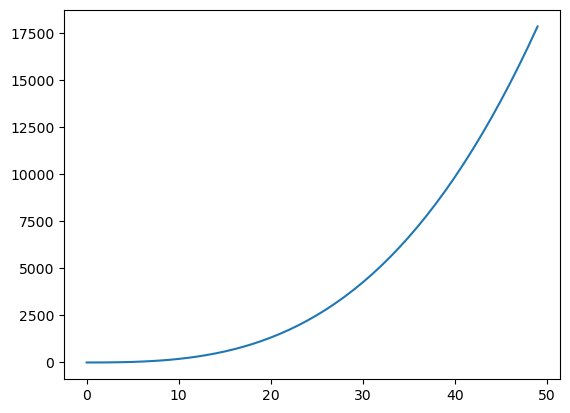

[0.00000e+00 1.00000e+00 4.00000e+00 1.30000e+01 3.00000e+01 6.00000e+01
 1.09000e+02 1.82000e+02 2.86000e+02 4.28000e+02 6.18000e+02 8.64000e+02
 1.17700e+03 1.56900e+03 2.05100e+03 2.63600e+03 3.33700e+03 4.17000e+03
 5.14900e+03 6.29100e+03 7.61400e+03 9.13500e+03 1.08730e+04 1.28470e+04
 1.50790e+04 1.75890e+04 2.04000e+04 2.35360e+04 2.70200e+04 3.08770e+04
 3.51320e+04 3.98130e+04 4.49460e+04 5.05600e+04 5.66850e+04 6.33500e+04
 7.05860e+04 7.84240e+04 8.68980e+04 9.60400e+04 1.05885e+05 1.16469e+05
 1.27827e+05 1.39996e+05 1.53013e+05 1.66918e+05 1.81749e+05 1.97547e+05
 2.14354e+05 2.32211e+05]


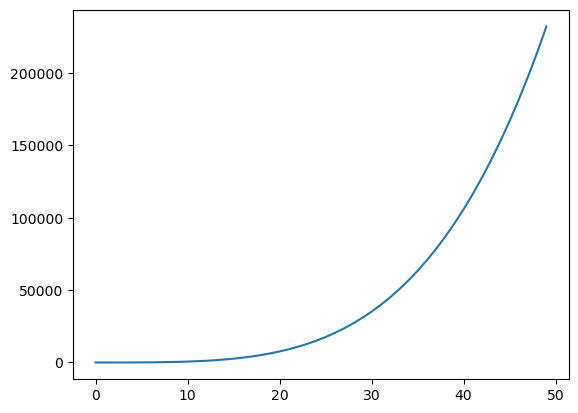

In [106]:
"""
Our progression curve for leveling the Virtual Pet will be based largly on the Pokemon progression curve
from Gen I. 

The amount of experience needed to achieve a particular level will be determined by a cubic function, a*x^3,
where a is a scaler to be determined.
"""
modifier = (1/7)
exp_level = np.floor(x**3*modifier) #scaled down by 1/7 cause the numbers get a little silly
plt.plot(exp_level)
plt.show()

"""
We calculate the summation to find the amount of TOTAL experience corresponding to each level
"""

summation = np.floor(np.cumsum(exp_level)) #take the floor, these are integers
plt.plot(summation)
print(summation)
plt.show()

In [107]:
"""
Experience Earned Function
Base*Level*(Mulipliers...)

Level: We need 5 different tiers for experienced gained. When integrating from Canvas, this will correspond to the
course number, 1000,2000,3000,4000,5000 When user creates their own tasks, this corresponds with Beginner, Novice
Intermediate, Advanced, Expert. Our target will be to increase between 8 and 12 levels per year, with an 
expectation of 8 courses of similar difficulty per year. 

Base: Within each tier, we will have several types of tasks with different base experience. For instance, the 
ordered list homework, quiz, test, project, will map to increasing base values. Base values must be chosen such
that completing 8 courses (typical year) will result in roughly 12 levels at an A level. 

We will assume a 'ideal course' to assign values. The perfect course will consist of 10 homeworks (h), 8 quizzes (q),
3 tests (t), and 4 projects (p). This reduces the question of selecting base values to solving 4 variations on
the following equation:

    summation[12] = 10*h+8*q+4*t+4*p  where p>=t>>q>=h and x in {12,22,32,42}
    

We can further assume the following distribution of grade percentages for the 'ideal course', 30% tests, 30%project
    15%quiz, 15%test (leaves 10% for attendence etc. which we will discuss later)
Therefore, the problem reduces again to the following set of linear equations (linear because x is known)
 
    summation[12]*0.15*(1/8) = 10*h*L1
    summation[12]*0.15*(1/8) = 8*q*L1
    summation[12]*0.30*(1/8) = 4*p*L1
    summation[12]*0.30*(1/8) = 3*t*L1
    
Multipliers can will be affected by the Pet's state such as lonliness, hunger etc. 

L = Loneliness: Increases stepwise on a daily basis with a maximum of 3 steps (to encourage engagement at least 
    twice a week.)
    
H = Hunger: Increases as assignments are not completed.     

G = Grade: .5-1.0 depending on grade received for assignment (Canvas only)
"""
x_steps = np.asarray([10,12,20,22,30,32,40,42])
x_targets = np.asarray([summation[10],summation[12],summation[20],summation[22],summation[30],summation[32],summation[40],summation[42]])
print(x_targets)
#let's define our targets
tar1,tar2,tar3,tar4 = 12,22,32,42

Target = x_targets[1]
L=1
h1 = math.ceil( (Target)*0.15*(1/8)*(1/10)*L )
q1 = math.ceil( (Target)*0.15*(1/8)*(1/8)*L )
p1 = math.ceil( (Target)*0.30*(1/8)*(1/4)*L )
t1 = math.ceil( (Target)*0.30*(1/8)*(1/3)*L )

b_l1 = [h1,q1,p1,t1]
s1 = (10*h1+8*q1+4*p1+3*t1)*8
s2 = ()
print(x_steps)
print("\n=====Tier 1====")
print("All A's, No Modifiers: "+str(s1))
print("Target: "+ str(summation[tar1]))


print("h:"+str(h1)+" q"+str(q1)+" p:"+str(p1)+" t:"+str(t1) )


Target = x_targets[3] - Target
L=1.125
h1 = math.ceil( (Target)*0.15*(1/8)*(1/10)*L )
q1 = math.ceil( (Target)*0.15*(1/8)*(1/8)*L )
p1 = math.ceil( (Target)*0.30*(1/8)*(1/4)*L )
t1 = math.ceil( (Target)*0.30*(1/8)*(1/3)*L )

b_l2 = [h1,q1,p1,t1]
s2 = (10*h1+8*q1+4*p1+3*t1)*8
#print(x_steps)
print("\n=====Tier 2====")
print("All A's, No Modifiers: "+str(s2))
print("Target: "+ str(Target))


print("h:"+str(h1)+" q"+str(q1)+" p:"+str(p1)+" t:"+str(t1) )

Target = x_targets[5] - Target
L=1.125
h1 = math.ceil( (Target)*0.15*(1/8)*(1/10)*L )
q1 = math.ceil( (Target)*0.15*(1/8)*(1/8)*L )
p1 = math.ceil( (Target)*0.30*(1/8)*(1/4)*L )
t1 = math.ceil( (Target)*0.30*(1/8)*(1/3)*L )

b_l3 = [h1,q1,p1,t1]
s2 = (10*h1+8*q1+4*p1+3*t1)*8
#print(x_steps)
print("\n=====Tier 3====")
print("All A's, No Modifiers: "+str(s2))
print("Target: "+ str(Target))


print("h:"+str(h1)+" q"+str(q1)+" p:"+str(p1)+" t:"+str(t1) )

Target = x_targets[7] - Target
L=1.125
h1 = math.ceil( (Target)*0.15*(1/8)*(1/10)*L )
q1 = math.ceil( (Target)*0.15*(1/8)*(1/8)*L )
p1 = math.ceil( (Target)*0.30*(1/8)*(1/4)*L )
t1 = math.ceil( (Target)*0.30*(1/8)*(1/3)*L )

b_l4 = [h1,q1,p1,t1]
s2 = (10*h1+8*q1+4*p1+3*t1)*8
#print(x_steps)
print("\n=====Tier 4====")
print("All A's, No Modifiers: "+str(s2))
print("Target: "+ str(Target))


print("h:"+str(h1)+" q"+str(q1)+" p:"+str(p1)+" t:"+str(t1) )


#plt.plot(x_targets,x_steps)
#plt.scatter()
#plt.show()


[   618.   1177.   7614.  10873.  35132.  44946. 105885. 127827.]
[10 12 20 22 30 32 40 42]

=====Tier 1====
All A's, No Modifiers: 1176
Target: 1177.0
h:3 q3 p:12 t:15

=====Tier 2====
All A's, No Modifiers: 9928
Target: 9696.0
h:21 q26 p:103 t:137

=====Tier 3====
All A's, No Modifiers: 35760
Target: 35250.0
h:75 q93 p:372 t:496

=====Tier 4====
All A's, No Modifiers: 93872
Target: 92577.0
h:196 q245 p:977 t:1302


In [108]:
"""
A complication with using the pokemon progression model is that there is a concept of the opposition having
a level, and this is what is used for L. We only have 4 tiers, so we need to ensure each selection for L 
corresponds to our progression targets. 

Thus, from the above caculation we can derive the true values for L by calculating the expected value.
"""


Base = np.asarray(b_l1)
L1 = 1
L2 = math.floor((1/4)*((b_l2[0]/Base[0])+(b_l2[1]/Base[1])+(b_l2[2]/Base[2])+(b_l2[3]/Base[3])))
L3 = math.floor((1/4)*((b_l3[0]/Base[0])+(b_l3[1]/Base[1])+(b_l3[2]/Base[2])+(b_l3[3]/Base[3])))
L4 = math.ceil((1/4)*((b_l4[0]/Base[0])+(b_l4[1]/Base[1])+(b_l4[2]/Base[2])+(b_l4[3]/Base[3])))
Levels = [L1,L2,L3,L4]

print("===Levels===")
print(Levels)
print("====Base====")
print(Base*L1)
print("====L2*Base====")
print(Base*L2)
print("====L3*Base====")
print(Base*L3)
print("====L4*Base====")
print(Base*L4)


===Levels===
[1, 8, 30, 79]
====Base====
[ 3  3 12 15]
====L2*Base====
[ 24  24  96 120]
====L3*Base====
[ 90  90 360 450]
====L4*Base====
[ 237  237  948 1185]


In [109]:
"""With the calculated values for L we can redo the above level target calculation."""
h,q,t,p = Base
s1 = L1*(h*10+q*8+t*3+p*4)*8
print(s1)
s2 = L2*(h*10+q*8+t*3+p*4)*8
print(s2)
s3 = L3*(h*10+q*8+t*3+p*4)*8
print(s3)
s4 = L4*((h*10+q*8+t*3+p*4)*8)
print(s4)


1200
9600
36000
94800


In [110]:
"""Let's compare our calculated L values with our targets to see how well we did!"""

print("Level 1 Target:" +str(summation[12]))
print("Level 1 Result:"+str(s1))
print("% Different:"+str(math.floor(abs(100* (((s1)-summation[12])/summation[12])))) + "\n")
print("Level 2 Target:"+str(summation[22]))
print("Level 2 Result:"+str(s2+s1))
print("% Different:"+str(math.floor(abs(100* (((s1+s2)-summation[22])/summation[22])))) + "\n")
print("Level 3 Target:"+str(summation[32]))
print("Level 3 Result:"+str(s3+s2))
print("% Different:"+str(math.floor(abs(100* (((s2+s3)-summation[32])/summation[32])))) + "\n")
print("Level 4 Target:"+str(summation[42]))
print("Level 4 Result:"+str(s4+s3))
print("% Different:"+str(math.floor(abs(100* (((s4+s3)-summation[42])/summation[42])))) + "\n")

Level 1 Target:1177.0
Level 1 Result:1200
% Different:1

Level 2 Target:10873.0
Level 2 Result:10800
% Different:0

Level 3 Target:44946.0
Level 3 Result:45600
% Different:1

Level 4 Target:127827.0
Level 4 Result:130800
% Different:2



In [111]:
Base = np.asarray(Base)
Levels = np.asarray([L1,L2,L3,L4])

"""Our final result for Base and Level"""
print("====Base====")
print(Base)
print("====Levels====")
print(Levels)
print("====Level 1====")
print(Base*Levels[0])
print("====Level 2====")
print(Base*Levels[1])
print("====Level 3====")
print(Base*Levels[2])
print("====Level 4====")
print(Base*Levels[3])

====Base====
[ 3  3 12 15]
====Levels====
[ 1  8 30 79]
====Level 1====
[ 3  3 12 15]
====Level 2====
[ 24  24  96 120]
====Level 3====
[ 90  90 360 450]
====Level 4====
[ 237  237  948 1185]
